<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(0__2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n20-2.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,42.193968,48.143843,86.250635,0.539838,187.128284,187.082937,0.045346
1,0.0,1.0,62.265844,43.975543,99.264117,-0.031877,215.473628,215.844708,-0.371080
2,0.0,2.0,36.436862,31.512289,24.476272,-0.138939,102.286485,102.737484,-0.450999
3,0.0,3.0,92.787999,28.423694,34.550469,-0.534934,165.227228,165.459403,-0.232175
4,0.0,4.0,86.731871,30.678466,61.125117,0.362021,188.897475,188.436514,0.460961
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.193643,80.468820,91.242070,2.079464,229.983997,228.048485,1.935512
19996,999.0,16.0,85.303031,77.918169,31.200777,-0.103133,204.318845,204.267565,0.051280
19997,999.0,17.0,82.143185,43.083090,42.891518,1.223597,179.341390,178.236084,1.105305
19998,999.0,18.0,71.624685,48.640995,32.702858,0.463522,163.432060,162.933986,0.498074


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    42.193968  48.143843  86.250635  ...  187.128284  187.082937  0.045346
      1.0    62.265844  43.975543  99.264117  ...  215.473628  215.844708 -0.371080
      2.0    36.436862  31.512289  24.476272  ...  102.286485  102.737484 -0.450999
      3.0    92.787999  28.423694  34.550469  ...  165.227228  165.459403 -0.232175
      4.0    86.731871  30.678466  61.125117  ...  188.897475  188.436514  0.460961
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   46.193643  80.468820  91.242070  ...  229.983997  228.048485  1.935512
      16.0   85.303031  77.918169  31.200777  ...  204.318845  204.267565  0.051280
      17.0   82.143185  43.083090  42.891518  ...  179.341390  178.236084  1.105305
      18.0   71.624685  48.640995  32.702858  ...  163.432060  162.933986  0.498074
      19.0   90.807462  75.534687  33.940820  ...  209.029773  210.185348 -1.155575

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    42.193968  48.143843  86.250635  ...  187.128284  187.082937  0.045346
      1.0    62.265844  43.975543  99.264117  ...  215.473628  215.844708 -0.371080
      2.0    36.436862  31.512289  24.476272  ...  102.286485  102.737484 -0.450999
      3.0    92.787999  28.423694  34.550469  ...  165.227228  165.459403 -0.232175
      4.0    86.731871  30.678466  61.125117  ...  188.897475  188.436514  0.460961
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   46.193643  80.468820  91.242070  ...  229.983997  228.048485  1.935512
      16.0   85.303031  77.918169  31.200777  ...  204.318845  204.267565  0.051280
      17.0   82.143185  43.083090  42.891518  ...  179.341390  178.236084  1.105305
      18.0   71.624685  48.640995  32.702858  ...  163.432060  162.933986  0.498074
      19.0   90.807462  75.534687  33.940820  ...  209.029773  210.185348 -1.155575

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,42.193968,48.143843,86.250635,0.539838,187.128284,187.082937,0.045346
1,0.0,1.0,62.265844,43.975543,99.264117,-0.031877,215.473628,215.844708,-0.371080
2,0.0,2.0,36.436862,31.512289,24.476272,-0.138939,102.286485,102.737484,-0.450999
3,0.0,3.0,92.787999,28.423694,34.550469,-0.534934,165.227228,165.459403,-0.232175
4,0.0,4.0,86.731871,30.678466,61.125117,0.362021,188.897475,188.436514,0.460961
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,46.193643,80.468820,91.242070,2.079464,229.983997,228.048485,1.935512
19996,999.0,16.0,85.303031,77.918169,31.200777,-0.103133,204.318845,204.267565,0.051280
19997,999.0,17.0,82.143185,43.083090,42.891518,1.223597,179.341390,178.236084,1.105305
19998,999.0,18.0,71.624685,48.640995,32.702858,0.463522,163.432060,162.933986,0.498074


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    42.193968  48.143843  86.250635  ...  187.128284  187.082937  0.045346
      1.0    62.265844  43.975543  99.264117  ...  215.473628  215.844708 -0.371080
      2.0    36.436862  31.512289  24.476272  ...  102.286485  102.737484 -0.450999
      3.0    92.787999  28.423694  34.550469  ...  165.227228  165.459403 -0.232175
      4.0    86.731871  30.678466  61.125117  ...  188.897475  188.436514  0.460961
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   46.193643  80.468820  91.242070  ...  229.983997  228.048485  1.935512
      16.0   85.303031  77.918169  31.200777  ...  204.318845  204.267565  0.051280
      17.0   82.143185  43.083090  42.891518  ...  179.341390  178.236084  1.105305
      18.0   71.624685  48.640995  32.702858  ...  163.432060  162.933986  0.498074
      19.0   90.807462  75.534687  33.940820  ...  209.029773  210.185348 -1.155575

[20000 rows x 7 columns]

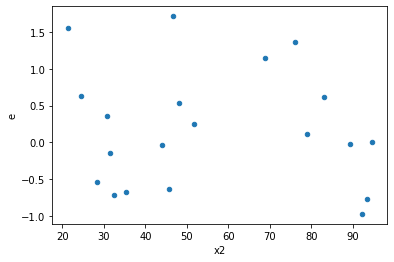

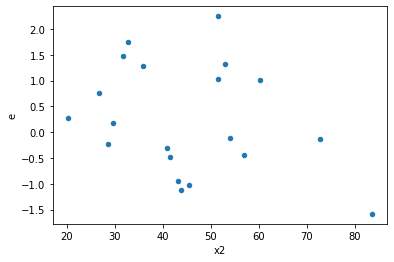

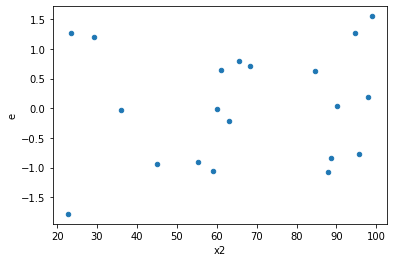

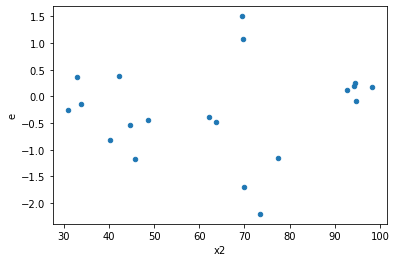

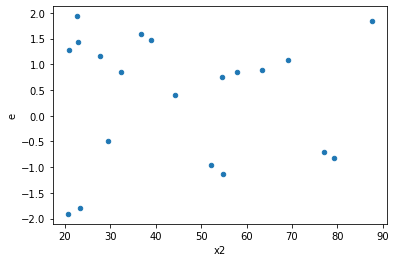

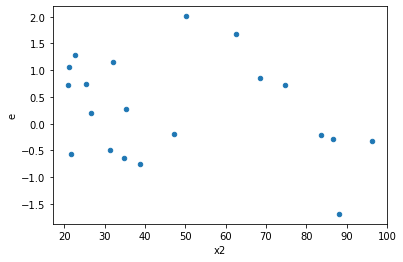

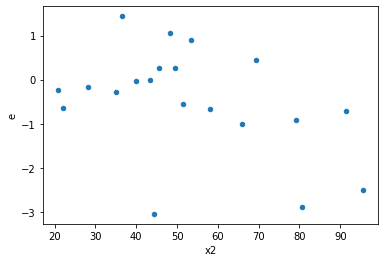

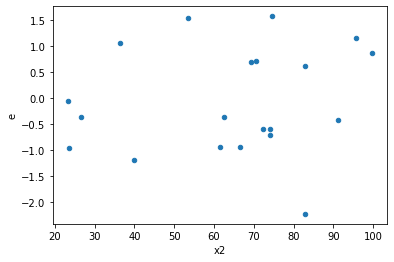

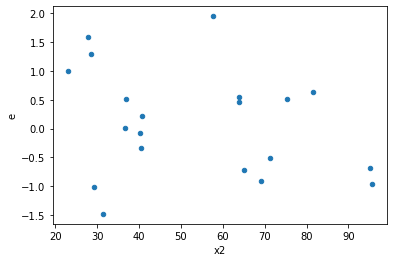

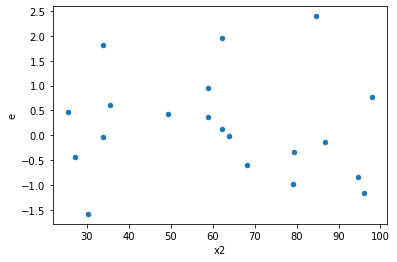

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,7.0,7.0,4.987376952641908,5.9342925135446825,0.7124824218059869,0.8477560733635261,1.1898624406966423,0.8244776079050287,0.5877611960474857,0.41223880395251433,Reject001=1 : Homoscedasticity
3.0,9.0,5.0,7.937460744170784,4.966054868782755,0.8819400826856427,0.993210973756551,1.1261660437657752,0.9458825841028422,0.5270587079485789,0.4729412920514211,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,3.431693399390572,6.229837029396463,0.5719488998984287,0.7787296286745579,1.361537068806061,0.6679808984394588,0.6660095507802706,0.3339904492197294,Reject001=1 : Homoscedasticity
7.0,11.0,3.0,10.073675955332998,3.993361612161526,0.9157887232120907,1.3311205373871753,1.4535236170176082,0.8440307245765255,0.5779846377117372,0.42201536228826275,Reject001=1 : Homoscedasticity
9.0,6.0,8.0,3.932303318127869,7.698634593817109,0.6553838863546448,0.9623293242271386,1.4683444989466796,0.5994566934664349,0.7002716532667825,0.29972834673321747,Reject001=1 : Homoscedasticity
10.0,5.0,9.0,0.5378684935554264,6.186723211535966,0.10757369871108528,0.6874136901706629,6.390165053419569,0.016823291604516788,0.9915883541977416,0.008411645802258394,Reject001=1 : Homoscedasticity
12.0,8.0,6.0,5.564200620316487,10.041474756606434,0.6955250775395608,1.6735791261010722,2.406209610761131,0.30070728909248756,0.8496463554537562,0.15035364454624378,Reject001=1 : Homoscedasticity
13.0,9.0,5.0,3.762103390110377,3.6840099794919694,0.4180114877900419,0.7368019958983939,1.7626357586336805,0.5520898702677597,0.7239550648661202,0.27604493513387984,Reject001=1 : Homoscedasticity
14.0,9.0,5.0,3.58560552825643,9.878378428289839,0.39840061425071444,1.9756756856579678,4.959017669623045,0.09261649033538988,0.9536917548323051,0.04630824516769494,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,5.0,7.288068195187905,1.1653745793966659,0.8097853550208783,0.23307491587933318,0.2878230810599482,0.1005444579730267,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,4.987376952641908,5.9342925135446825,0.7124824218059869,0.8477560733635261,1.1898624406966423,0.8244776079050287,Reject001=1 : Homoscedasticity
2.0,6.0,8.0,7.48450439789207,6.009795380809053,1.2474173996486784,0.7512244226011316,0.6022237807591155,0.5531640967278662,Reject001=1 : Homoscedasticity
3.0,9.0,5.0,7.937460744170784,4.966054868782755,0.8819400826856427,0.993210973756551,1.1261660437657752,0.9458825841028422,Reject001=1 : Homoscedasticity
4.0,8.0,6.0,14.547992426193016,4.738269920877854,1.818499053274127,0.7897116534796423,0.4342656390487537,0.27280626404027825,Reject001=1 : Homoscedasticity
5.0,6.0,8.0,3.431693399390572,6.229837029396463,0.5719488998984287,0.7787296286745579,1.361537068806061,0.6679808984394588,Reject001=1 : Homoscedasticity
6.0,8.0,6.0,9.431291034789663,3.4058970980543917,1.1789113793487078,0.5676495163423986,0.4815031276193108,0.33395404560229774,Reject001=1 : Homoscedasticity
7.0,11.0,3.0,10.073675955332998,3.993361612161526,0.9157887232120907,1.3311205373871753,1.4535236170176082,0.8440307245765255,Reject001=1 : Homoscedasticity
8.0,4.0,10.0,4.37904255793517,3.9675977677418177,1.0947606394837925,0.3967597767741818,0.362416917876463,0.340153210372887,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      952
Reject001=0 : Heteroscedasticity     48
Name: Result_test, dtype: int64